In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sgutil
import joblib

sc = sgutil.SGCache('img', 'result', 'model')
data_processor = joblib.load('model/data_processor.joblib')

In [13]:
s_prd = sc.read_result('e_prd')
target = 'rainfall'
df_train = data_processor.transform(['data/train.csv'])

In [10]:
df_train.head()

,day,rainfall,sin_ed,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,...,humidity_ma24,cloud_ma24,sunshine_ma24,windspeed_ma24,cos_wd_ma24,sin_wd_ma24,chp_ma24,year,expected_day,winddirection
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,0.000000,0.680597,-0.913473,-0.641047,-0.443439,-0.198771,0.615466,0.673271,...,1.702161,1.635068,-1.415639,-1.109555,0.371321,0.650175,1.733391,0.0,0.000000,0.172414
1,2,1,0.008607,1.054482,-1.797343,-1.347884,-1.249644,-0.951720,1.640146,0.839943,...,1.702161,1.635068,-1.415639,-1.109555,0.371321,0.650175,1.733391,0.0,0.002747,0.137931
2,3,1,0.017213,1.873474,-1.231666,-1.500714,-1.485606,-2.099967,-0.921554,-1.604580,...,3.116827,1.837066,-1.711980,-0.561430,0.621032,0.743429,2.373951,0.0,0.005495,0.206897
3,4,1,0.025818,-0.031574,-1.461472,-1.175951,-1.033345,-0.688188,1.640146,1.062173,...,1.230605,-0.070698,-0.320073,-0.674164,0.464560,0.782184,0.333864,0.0,0.008242,0.172414
4,5,0,0.034422,1.463978,-0.895796,-1.061329,-1.367625,-2.043495,-3.867510,-1.715695,...,2.055827,0.591408,-0.742135,0.289915,0.650975,1.144237,1.146962,0.0,0.010989,0.103448


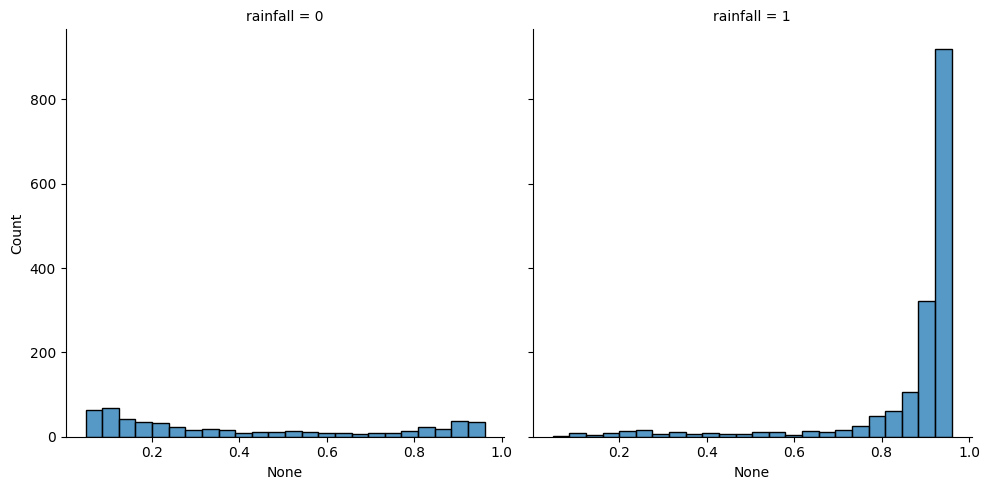

In [14]:
sns.displot(x=s_prd, col = df_train[target])
plt.show()

In [15]:
df_train = df_train.assign(
    FP = lambda x: (s_prd > 0.5) & (x[target] == 0),
    FN = lambda x: (s_prd < 0.5) & (x[target] == 1)
)

In [17]:
from scipy.stats import mannwhitneyu

In [22]:
X_all = [i for i in df_train.columns if i not in [target, 'day', 'FP', 'FN']]

In [27]:
s_mw_FP = df_train[X_all].apply(
    lambda x: mannwhitneyu(x.loc[df_train['FP']], x.loc[~df_train['FP']]).pvalue
)
s_mw_FP.sort_values().iloc[:15]

chp              0.000001
humidity         0.000036
cloud            0.000075
sunshine         0.000541
cloud_ma24       0.005424
chp_ma24         0.005523
sunshine_ma24    0.016882
cloud_6          0.047147
sunshine_1       0.049662
humidity_ma24    0.051505
expected_day     0.053699
cloud_3          0.061053
windspeed        0.095018
year             0.108907
sin_wd_5         0.109286
dtype: float64

In [28]:
s_mw_FN = df_train[X_all].apply(
    lambda x: mannwhitneyu(x.loc[df_train['FN']], x.loc[~df_train['FN']]).pvalue
)
s_mw_FN.sort_values().iloc[:15]

chp                 4.418471e-37
cloud               9.878389e-37
sunshine            7.964536e-35
humidity            2.537572e-24
cloud_ma24          7.130765e-10
chp_ma24            1.778094e-09
sunshine_ma24       3.949164e-09
maxtemp             6.271983e-06
humidity_ma24       1.139164e-05
sunshine_1          3.343068e-05
chp_1               3.419619e-05
mintemp_ma24        3.835102e-05
maxtemp_ma24        4.454636e-05
temparature_ma24    5.053494e-05
sin_wd_ma24         6.296899e-05
dtype: float64